In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_1samp, shapiro
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import recall_score, make_scorer, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG, display
# import shap

import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
# from pycaret.classification import *
import lightgbm as lgb
from sklearn.metrics import recall_score
import six
import sys
sys.modules['sklearn.externals.six'] = six
# from skopt.space import Real, Integer, Categorical
# from skopt import gp_minimize, space
from functools import partial
from sklearn.metrics import average_precision_score
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
# from functools import partial
# from skopt import gp_minimize
# from skopt import space
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
# from functools import partial
# from skopt import gp_minimize
# from skopt import space
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_curve, auc
# import shap
# import lime

In [3]:
df = pd.read_csv('/content/sample_data/Best_dataset_fp.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

X = train_df.drop(['TenYearCHD'], axis = 1)
y = train_df['TenYearCHD']
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
X_test = test_df.drop(['TenYearCHD'], axis = 1)
y_test = test_df['TenYearCHD']

In [4]:
X.shape

(2676, 11)

Text(0.5, 1.0, 'Importance of Features')

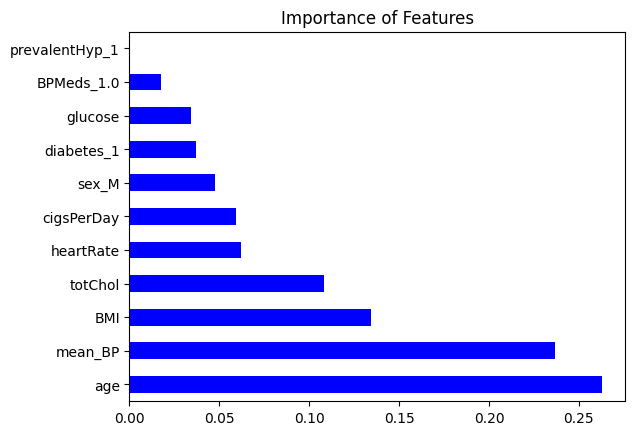

In [5]:
params = {'learning_rate': 0.024998785901829815, 'max_depth': 5, 'subsample': 0.6593086507635105,
          'max_features': 0.5352246704995934, 'n_estimators': 62, 'min_samples_split': 34, 'min_samples_leaf': 11}

gb = GradientBoostingClassifier(**params)
gb.fit(X, y)
importancegb = pd.Series(gb.feature_importances_, index = X.columns)
importancegb_sorted = importancegb.sort_values()
importancegb_sorted.nlargest(11).plot(kind = 'barh', color = 'blue')
plt.title("Importance of Features")

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

top_features = importancegb_sorted[:11]

# Select the top 8 features from the train and test sets
top_features_train = X[top_features.index[:11]]
top_features_test = X_test[top_features.index[:11]]

# Train a Naive Bayes classifier on the top 8 features
naive_bayes = GaussianNB()
naive_bayes.fit(top_features_train, y)

# Make predictions on the test set using the trained model
y_pred = naive_bayes.predict(top_features_test)

# Calculate the ROC AUC score for the predictions
roc_auc = roc_auc_score(y_test, y_pred)

print("ROC AUC:", roc_auc)


ROC AUC: 0.5512027724925251


Number of Features: 5, ROC AUC: 0.5172601250339766
Number of Features: 6, ROC AUC: 0.5332461266648546
Number of Features: 7, ROC AUC: 0.5332461266648546
Number of Features: 8, ROC AUC: 0.5367796955694482
Number of Features: 9, ROC AUC: 0.5293218265833106
Number of Features: 10, ROC AUC: 0.5389372111986953
Number of Features: 11, ROC AUC: 0.5512027724925251


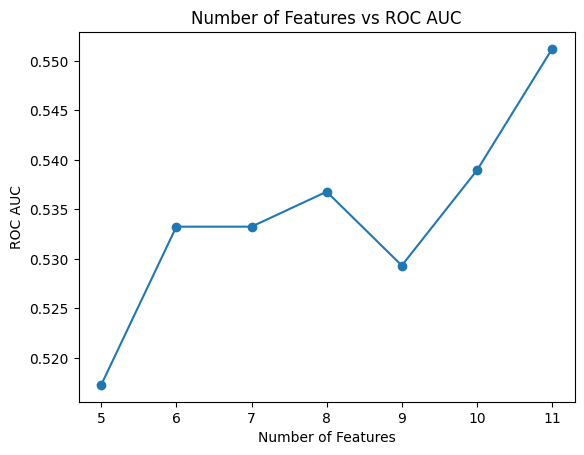

In [11]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

top_features = importancegb_sorted[:11]

roc_auc_scores = []  # List to store ROC AUC scores
num_features = []  # List to store number of features

for i in range(5, 12):
    # Select the top i features from the train and test sets
    top_features_train = X[top_features.index[:i]]
    top_features_test = X_test[top_features.index[:i]]

    # Train a Naive Bayes classifier on the top i features
    naive_bayes = GaussianNB()
    naive_bayes.fit(top_features_train, y)

    # Make predictions on the test set using the trained model
    y_pred = naive_bayes.predict(top_features_test)

    # Calculate the ROC AUC score for the predictions
    roc_auc = roc_auc_score(y_test, y_pred)

    roc_auc_scores.append(roc_auc)
    num_features.append(i)

    print(f"Number of Features: {i}, ROC AUC: {roc_auc}")

# Plotting the graph
plt.plot(num_features, roc_auc_scores, marker='o')
plt.xlabel("Number of Features")
plt.ylabel("ROC AUC")
plt.title("Number of Features vs ROC AUC")
plt.show()


Number of Features: 5, Precision-Recall AUC: 0.23510332950631457
Number of Features: 6, Precision-Recall AUC: 0.2656519391309424
Number of Features: 7, Precision-Recall AUC: 0.2656519391309424
Number of Features: 8, Precision-Recall AUC: 0.2748969314267822
Number of Features: 9, Precision-Recall AUC: 0.25727888895602957
Number of Features: 10, Precision-Recall AUC: 0.27818793905310474
Number of Features: 11, Precision-Recall AUC: 0.3058899798091769


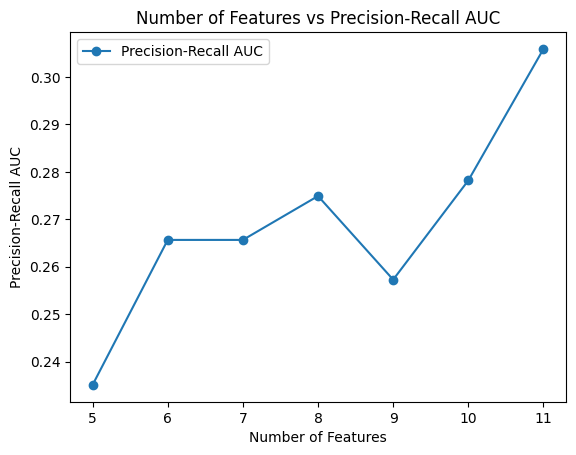

In [13]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve, auc

top_features = importancegb_sorted[:11]

precision_scores = []  # List to store precision scores
recall_scores = []  # List to store recall scores
num_features = []  # List to store number of features

for i in range(5, 12):
    # Select the top i features from the train and test sets
    top_features_train = X[top_features.index[:i]]
    top_features_test = X_test[top_features.index[:i]]

    # Train a Naive Bayes classifier on the top i features
    naive_bayes = GaussianNB()
    naive_bayes.fit(top_features_train, y)

    # Make predictions on the test set using the trained model
    y_pred = naive_bayes.predict(top_features_test)

    # Calculate precision and recall scores
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    pr_auc = auc(recall, precision)

    precision_scores.append(pr_auc)
    recall_scores.append(recall)
    num_features.append(i)

    print(f"Number of Features: {i}, Precision-Recall AUC: {pr_auc}")

# Plotting the graph
plt.plot(num_features, precision_scores, marker='o', label='Precision-Recall AUC')
plt.xlabel("Number of Features")
plt.ylabel("Precision-Recall AUC")
plt.title("Number of Features vs Precision-Recall AUC")
plt.legend()
plt.show()
